In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:

file_path = "FPPP_Data.csv"
df = pd.read_csv(file_path)

df.head()


,College Code,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Total Sponsored Research,Total Consultancy Projects,Faculty Count,FPPP
0,IR-E-C-1297,46136934,30930679,12605355,9311868,3742035,4732593,NaN,NaN,89672968,17786496,296,0.41
1,IR-E-U-0701,328564287,290548221,289963998,242974613,193158980,128762896,NaN,NaN,909076506,564896489,381,2.19
2,IR-E-U-0490,139097324,225184388,117044496,26472034,22015325,16511146,NaN,NaN,481326208,64998505,3068,0.20
3,IR-E-U-0575,248817816,178407096,548289485,274038412,163177698,120390748,NaN,NaN,975514397,557606858,463,2.66
4,IR-E-U-0473,156143832,84320696,53107928,59590517,10569019,7544775,NaN,NaN,293572456,77704311,1659,0.26


In [ ]:
# Computing RF and CF per faculty
df["RF"] = df["Total Sponsored Research"] / (3 * df["Faculty Count"])
df["CF"] = df["Total Consultancy Projects"] / (3 * df["Faculty Count"])

# Computing FPR and FPC
df["FPR"] = 0.75 * df["FPPP"]
df["FPC"] = 0.25 * df["FPPP"]

# Computing f(RF) and f(CF)
df["f_RF"] = df["FPR"] / 7.5
df["f_CF"] = df["FPC"] / 2.5

df[["College Code", "RF", "CF", "FPPP", "f_RF", "f_CF"]].head()


,College Code,RF,CF,FPPP,f_RF,f_CF
0,IR-E-C-1297,100983.072072,20029.837838,0.41,0.041,0.041
1,IR-E-U-0701,795342.524934,494222.650044,2.19,0.219,0.219
2,IR-E-U-0490,52295.328987,7061.984463,0.20,0.020,0.020
3,IR-E-U-0575,702314.180706,401444.822174,2.66,0.266,0.266
4,IR-E-U-0473,58985.826000,15612.680530,0.26,0.026,0.026


f(RF)

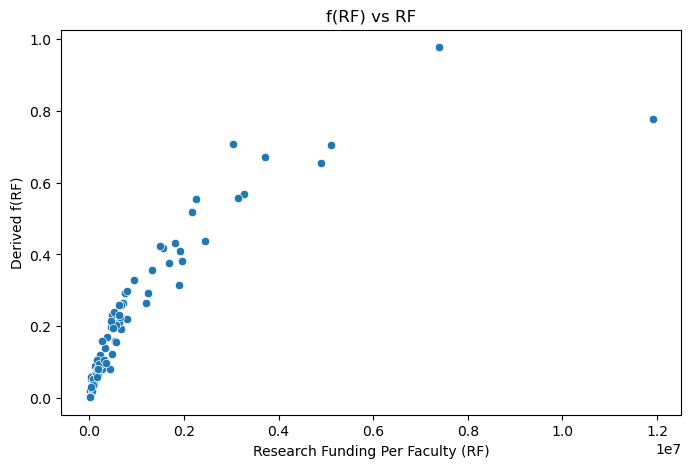

In [ ]:
# Scatter plot of RF vs f(RF)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["RF"], y=df["f_RF"])
plt.xlabel("Research Funding Per Faculty (RF)")
plt.ylabel("Derived f(RF)")
plt.title("f(RF) vs RF")
plt.show()


In [ ]:

X = df[["RF"]]
y = df["f_RF"]

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Training polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
print("Intercept:", poly_model.intercept_)
print("Coefficients:", poly_model.coef_)


Intercept: 0.03518576541574783
Coefficients: [ 2.62896406e-07 -2.79795929e-14  9.47205879e-22]


In [ ]:
# predicting values
y_pred = poly_model.predict(X_poly)

# evaluation metrics computation
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0325
Mean Squared Error (MSE): 0.0018
R² Score: 0.9544


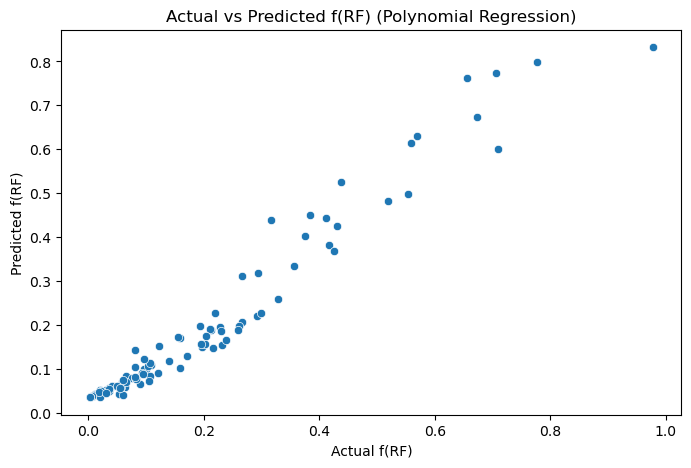

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual f(RF)")
plt.ylabel("Predicted f(RF)")
plt.title("Actual vs Predicted f(RF) (Polynomial Regression)")
plt.show()


f(cf)

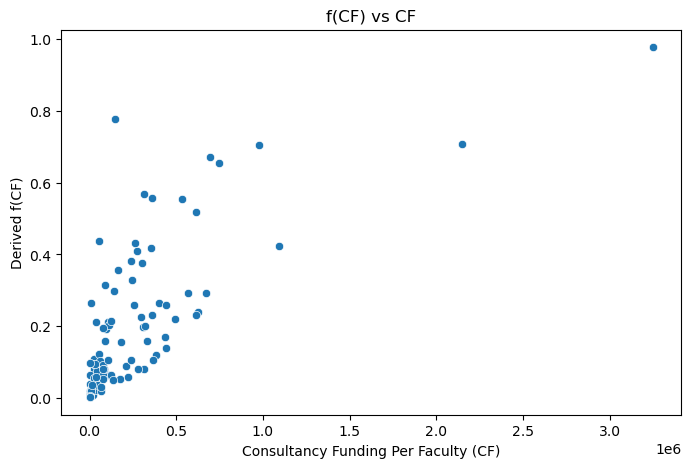

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CF"], y=df["f_CF"])
plt.xlabel("Consultancy Funding Per Faculty (CF)")
plt.ylabel("Derived f(CF)")
plt.title("f(CF) vs CF")
plt.show()


In [ ]:

X_cf = df[["CF"]]
y_cf = df["f_CF"]

# Creating polynomial  for degree 2
poly_cf = PolynomialFeatures(degree=3, include_bias=False)
X_cf_poly = poly_cf.fit_transform(X_cf)

# Training
poly_model_cf = LinearRegression()
poly_model_cf.fit(X_cf_poly, y_cf)

print("Intercept:", poly_model_cf.intercept_)
print("Coefficients:", poly_model_cf.coef_)


Intercept: 0.057370907082586214
Coefficients: [ 7.59362953e-07 -3.43740660e-13  6.07394704e-20]


In [ ]:
# Removing outliears
Q1 = df["CF"].quantile(0.25)
Q3 = df["CF"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df["CF"] >= lower_bound) & (df["CF"] <= upper_bound)]
print(f"Original Size: {df.shape[0]}, Filtered Size: {df_filtered.shape[0]}")


Original Size: 100, Filtered Size: 96


In [ ]:
# predicting f(CF)
y_cf_pred = poly_model_cf.predict(X_cf_poly)

mae_cf = mean_absolute_error(y_cf, y_cf_pred)
mse_cf = mean_squared_error(y_cf, y_cf_pred)
r2_cf = r2_score(y_cf, y_cf_pred)

print(f"Mean Absolute Error (MAE) for f(CF): {mae_cf:.4f}")
print(f"Mean Squared Error (MSE) for f(CF): {mse_cf:.4f}")
print(f"R² Score for f(CF): {r2_cf:.4f}")


Mean Absolute Error (MAE) for f(CF): 0.0945
Mean Squared Error (MSE) for f(CF): 0.0166
R² Score for f(CF): 0.5857


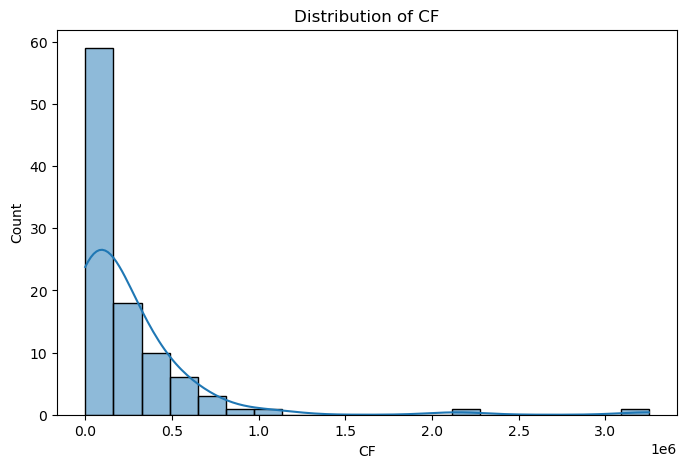

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.histplot(df["CF"], bins=20, kde=True)
plt.title("Distribution of CF")
plt.show()


C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


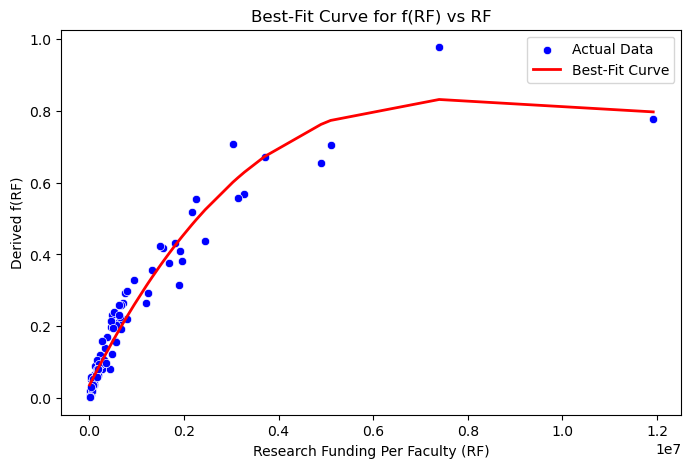

In [ ]:
X_rf_sorted = np.sort(df["RF"]).reshape(-1, 1)

X_rf_poly_sorted = poly.transform(X_rf_sorted)

# Predicting f(RF)
y_rf_pred_sorted = poly_model.predict(X_rf_poly_sorted)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["RF"], y=df["f_RF"], label="Actual Data", color="blue")

# Plotting best-fit polynomial regression curve
plt.plot(X_rf_sorted, y_rf_pred_sorted, color="red", linewidth=2, label="Best-Fit Curve")

# Labels and title
plt.xlabel("Research Funding Per Faculty (RF)")
plt.ylabel("Derived f(RF)")
plt.title("Best-Fit Curve for f(RF) vs RF")
plt.legend()
plt.show()


C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


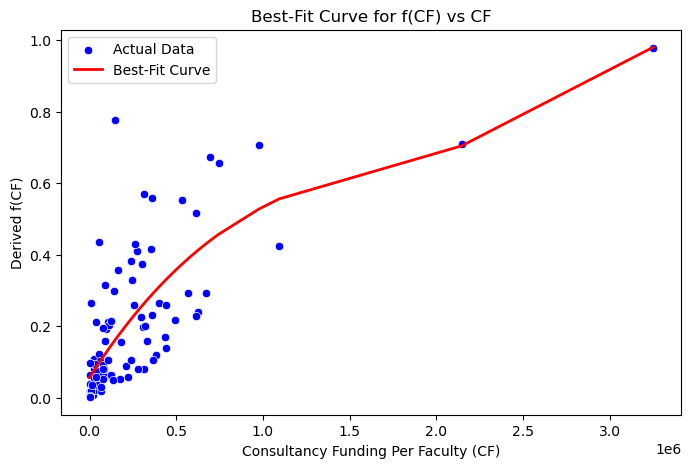

In [ ]:
X_cf_sorted = np.sort(df["CF"]).reshape(-1, 1)

X_cf_poly_sorted = poly_cf.transform(X_cf_sorted)

# Predicting f(CF)
y_cf_pred_sorted = poly_model_cf.predict(X_cf_poly_sorted)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CF"], y=df["f_CF"], label="Actual Data", color="blue")

# Plotting best-fit polynomial regression curve
plt.plot(X_cf_sorted, y_cf_pred_sorted, color="red", linewidth=2, label="Best-Fit Curve")
plt.xlabel("Consultancy Funding Per Faculty (CF)")
plt.ylabel("Derived f(CF)")
plt.title("Best-Fit Curve for f(CF) vs CF")
plt.legend()
plt.show()


In [ ]:
def predict_fppp(rf_input, cf_input):

    rf_features = poly.transform([[rf_input]])
    f_rf_pred = poly_model.predict(rf_features)[0]  # Predicted f(RF)

    cf_features = poly_cf.transform([[cf_input]])
    f_cf_pred = poly_model_cf.predict(cf_features)[0]  # Predicted f(CF)

    # Computing FPPP using predicted f(RF) and f(CF)
    fppp_pred = (7.5 * f_rf_pred) + (2.5 * f_cf_pred)

    print(f"Predicted f(RF) for RF={rf_input}: {f_rf_pred:.4f}")
    print(f"Predicted f(CF) for CF={cf_input}: {f_cf_pred:.4f}")
    print(f"Predicted FPPP Score: {fppp_pred:.4f}")

    return fppp_pred


In [ ]:
rf_test = 1895991.90115
cf_test = 88580.8229885
predict_fppp(rf_test, cf_test)

Predicted f(RF) for RF=1895991.90115: 0.4395
Predicted f(CF) for CF=88580.8229885: 0.1220
Predicted FPPP Score: 3.6013


C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


3.6012807044184387

In [ ]:
df[["College Code", "RF", "CF", "FPPP", "f_RF", "f_CF"]].head()

,College Code,RF,CF,FPPP,f_RF,f_CF
0,IR-E-C-1297,100983.072072,20029.837838,0.41,0.041,0.041
1,IR-E-U-0701,795342.524934,494222.650044,2.19,0.219,0.219
2,IR-E-U-0490,52295.328987,7061.984463,0.20,0.020,0.020
3,IR-E-U-0575,702314.180706,401444.822174,2.66,0.266,0.266
4,IR-E-U-0473,58985.826000,15612.680530,0.26,0.026,0.026


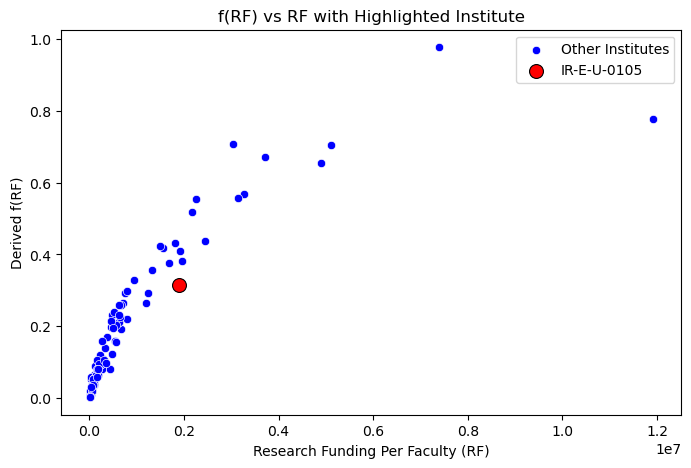

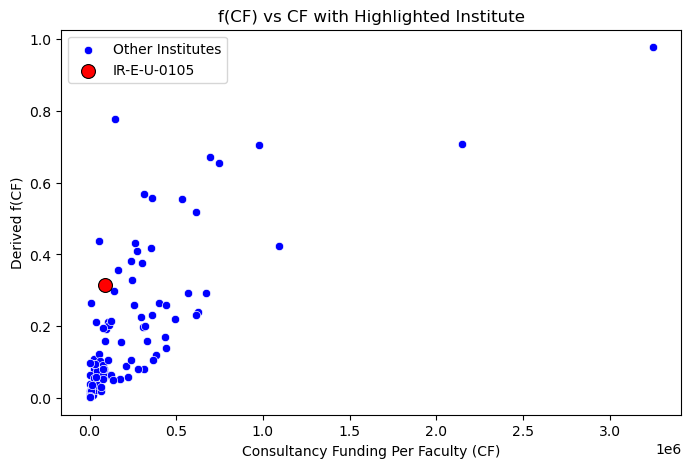

In [ ]:
# For IIITD
highlight_institute = "IR-E-U-0105"
highlight_data = df[df["College Code"] == highlight_institute]

#plot for f(RF) vs RF
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["RF"], y=df["f_RF"], color="blue", label="Other Institutes")
sns.scatterplot(x=highlight_data["RF"], y=highlight_data["f_RF"], color="red", s=100, label="IR-E-U-0105", edgecolor="black")

plt.xlabel("Research Funding Per Faculty (RF)")
plt.ylabel("Derived f(RF)")
plt.title("f(RF) vs RF with Highlighted Institute")
plt.legend()
plt.show()

#plot for f(CF) vs CF
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["CF"], y=df["f_CF"], color="blue", label="Other Institutes")
sns.scatterplot(x=highlight_data["CF"], y=highlight_data["f_CF"], color="red", s=100, label="IR-E-U-0105", edgecolor="black")

plt.xlabel("Consultancy Funding Per Faculty (CF)")
plt.ylabel("Derived f(CF)")
plt.title("f(CF) vs CF with Highlighted Institute")
plt.legend()
plt.show()


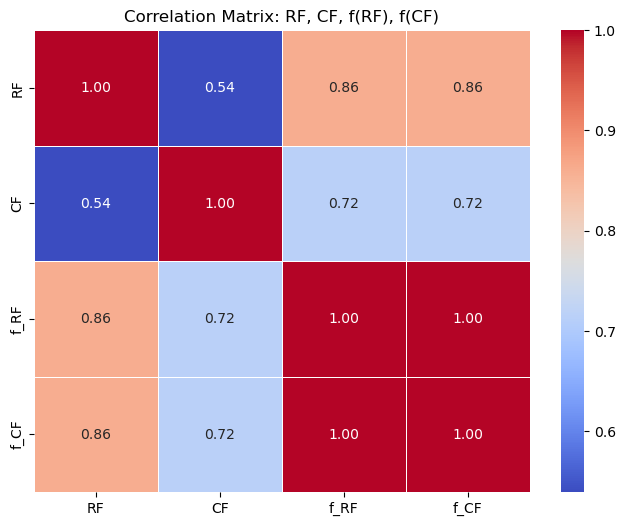

In [ ]:
#correlation matrix
correlation_df = df[["RF", "CF", "f_RF", "f_CF"]]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: RF, CF, f(RF), f(CF)")
plt.show()
